In [63]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [64]:
df = pd.read_csv('electric_vehicles_spec_2025.csv')

### General dataset info

In [65]:
df.head()

,brand,model,top_speed_kmh,battery_capacity_kWh,battery_type,number_of_cells,torque_nm,efficiency_wh_per_km,range_km,acceleration_0_100_s,...,towing_capacity_kg,cargo_volume_l,seats,drivetrain,segment,length_mm,width_mm,height_mm,car_body_type,source_url
0,Abarth,500e Convertible,155,37.8,Lithium-ion,192.0,235.0,156,225,7.0,...,0.0,185,4,FWD,B - Compact,3673,1683,1518,Hatchback,https://ev-database.org/car/1904/Abarth-500e-C...
1,Abarth,500e Hatchback,155,37.8,Lithium-ion,192.0,235.0,149,225,7.0,...,0.0,185,4,FWD,B - Compact,3673,1683,1518,Hatchback,https://ev-database.org/car/1903/Abarth-500e-H...
2,Abarth,600e Scorpionissima,200,50.8,Lithium-ion,102.0,345.0,158,280,5.9,...,0.0,360,5,FWD,JB - Compact,4187,1779,1557,SUV,https://ev-database.org/car/3057/Abarth-600e-S...
3,Abarth,600e Turismo,200,50.8,Lithium-ion,102.0,345.0,158,280,6.2,...,0.0,360,5,FWD,JB - Compact,4187,1779,1557,SUV,https://ev-database.org/car/3056/Abarth-600e-T...
4,Aiways,U5,150,60.0,Lithium-ion,NaN,310.0,156,315,7.5,...,NaN,496,5,FWD,JC - Medium,4680,1865,1700,SUV,https://ev-database.org/car/1678/Aiways-U5


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478 entries, 0 to 477
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   brand                      478 non-null    object 
 1   model                      477 non-null    object 
 2   top_speed_kmh              478 non-null    int64  
 3   battery_capacity_kWh       478 non-null    float64
 4   battery_type               478 non-null    object 
 5   number_of_cells            276 non-null    float64
 6   torque_nm                  471 non-null    float64
 7   efficiency_wh_per_km       478 non-null    int64  
 8   range_km                   478 non-null    int64  
 9   acceleration_0_100_s       478 non-null    float64
 10  fast_charging_power_kw_dc  477 non-null    float64
 11  fast_charge_port           477 non-null    object 
 12  towing_capacity_kg         452 non-null    float64
 13  cargo_volume_l             477 non-null    object 

### Seems like `cargo_volume_l` should be numeric

In [67]:
# df['cargo_volume_l'] = df['cargo_volume_l'].astype(float)

'''
---------------------------------------------------------------------------
ValueError                                Traceback (most recent call last)
/tmp/ipython-input-509098036.py in <cell line: 0>()
----> 1 df['cargo_volume_l'] = df['cargo_volume_l'].astype(float)

6 frames
/usr/local/lib/python3.12/dist-packages/pandas/core/dtypes/astype.py in _astype_nansafe(arr, dtype, copy, skipna)
    131     if copy or arr.dtype == object or dtype == object:
    132         # Explicit copy, or required since NumPy can't view from / to object.
--> 133         return arr.astype(dtype, copy=True)
    134
    135     return arr.astype(dtype, copy=copy)

ValueError: could not convert string to float: '10 Banana Boxes'
''';

In [68]:
df[df['cargo_volume_l'].str.len() > 4]

,brand,model,top_speed_kmh,battery_capacity_kWh,battery_type,number_of_cells,torque_nm,efficiency_wh_per_km,range_km,acceleration_0_100_s,...,towing_capacity_kg,cargo_volume_l,seats,drivetrain,segment,length_mm,width_mm,height_mm,car_body_type,source_url
29,Audi,Q6 e-tron quattro,210,94.9,Lithium-ion,180.0,855.0,176,480,5.9,...,2400.0,10 Banana Boxes,5,AWD,JD - Large,4771,1939,1685,SUV,https://ev-database.org/car/2146/Audi-Q6-e-tro...
213,Maxus,MIFA 9,180,84.0,Lithium-ion,NaN,350.0,195,365,9.2,...,1000.0,31 Banana Boxes,7,FWD,N - Passenger Van,5270,2000,1840,Small Passenger Van,https://ev-database.org/car/1837/Maxus-MIFA-9
246,Mercedes-Benz,EQS SUV 580 4MATIC,210,118.0,Lithium-ion,NaN,858.0,199,530,4.7,...,1800.0,13 Banana Boxes,7,AWD,JF - Luxury,5125,1959,1718,SUV,https://ev-database.org/car/2090/Mercedes-Benz...


In [69]:
def convert_cargo_volume_to_l(volume):
  try:
    if 'Banana Boxes' in volume:
      volume = volume.split(' ')[0]
      int_vol = float(volume) * 52 # A typical banana box is 52 litres
      return int_vol
    else:
      return float(volume)
  except Exception:
    return None

In [70]:
df['cargo_volume_l'] = df['cargo_volume_l'].apply(convert_cargo_volume_to_l)

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478 entries, 0 to 477
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   brand                      478 non-null    object 
 1   model                      477 non-null    object 
 2   top_speed_kmh              478 non-null    int64  
 3   battery_capacity_kWh       478 non-null    float64
 4   battery_type               478 non-null    object 
 5   number_of_cells            276 non-null    float64
 6   torque_nm                  471 non-null    float64
 7   efficiency_wh_per_km       478 non-null    int64  
 8   range_km                   478 non-null    int64  
 9   acceleration_0_100_s       478 non-null    float64
 10  fast_charging_power_kw_dc  477 non-null    float64
 11  fast_charge_port           477 non-null    object 
 12  towing_capacity_kg         452 non-null    float64
 13  cargo_volume_l             477 non-null    float64

In [72]:
df.describe()

,top_speed_kmh,battery_capacity_kWh,number_of_cells,torque_nm,efficiency_wh_per_km,range_km,acceleration_0_100_s,fast_charging_power_kw_dc,towing_capacity_kg,cargo_volume_l,seats,length_mm,width_mm,height_mm
count,478.000000,478.000000,276.000000,471.000000,478.000000,478.000000,478.000000,477.000000,452.000000,477.000000,478.000000,478.000000,478.000000,478.000000
mean,185.487448,74.043724,485.293478,498.012739,162.903766,393.179916,6.882636,125.008386,1052.261062,496.641509,5.263598,4678.506276,1887.359833,1601.125523
std,34.252773,20.331058,1210.819733,241.461128,34.317532,103.287335,2.730696,58.205012,737.851774,193.495845,1.003961,369.210573,73.656807,130.754851
min,125.000000,21.300000,72.000000,113.000000,109.000000,135.000000,2.200000,29.000000,0.000000,151.000000,2.000000,3620.000000,1610.000000,1329.000000
25%,160.000000,60.000000,150.000000,305.000000,143.000000,320.000000,4.800000,80.000000,500.000000,385.000000,5.000000,4440.000000,1849.000000,1514.000000
50%,180.000000,76.150000,216.000000,430.000000,155.000000,397.500000,6.600000,113.000000,1000.000000,470.000000,5.000000,4720.000000,1890.000000,1596.000000
75%,201.000000,90.600000,324.000000,679.000000,177.750000,470.000000,8.200000,150.000000,1600.000000,545.000000,5.000000,4961.000000,1939.000000,1665.000000
max,325.000000,118.000000,7920.000000,1350.000000,370.000000,685.000000,19.100000,281.000000,2500.000000,1612.000000,9.000000,5908.000000,2080.000000,1986.000000


Target feature: `range_km`

### Correlation matrix and heatmap for the numeric features

In [73]:
# Select numeric fields
numeric_df = df.select_dtypes(include=np.number)

In [74]:
# Calculate correlation matrix of numerical columns
corr = numeric_df.corr()

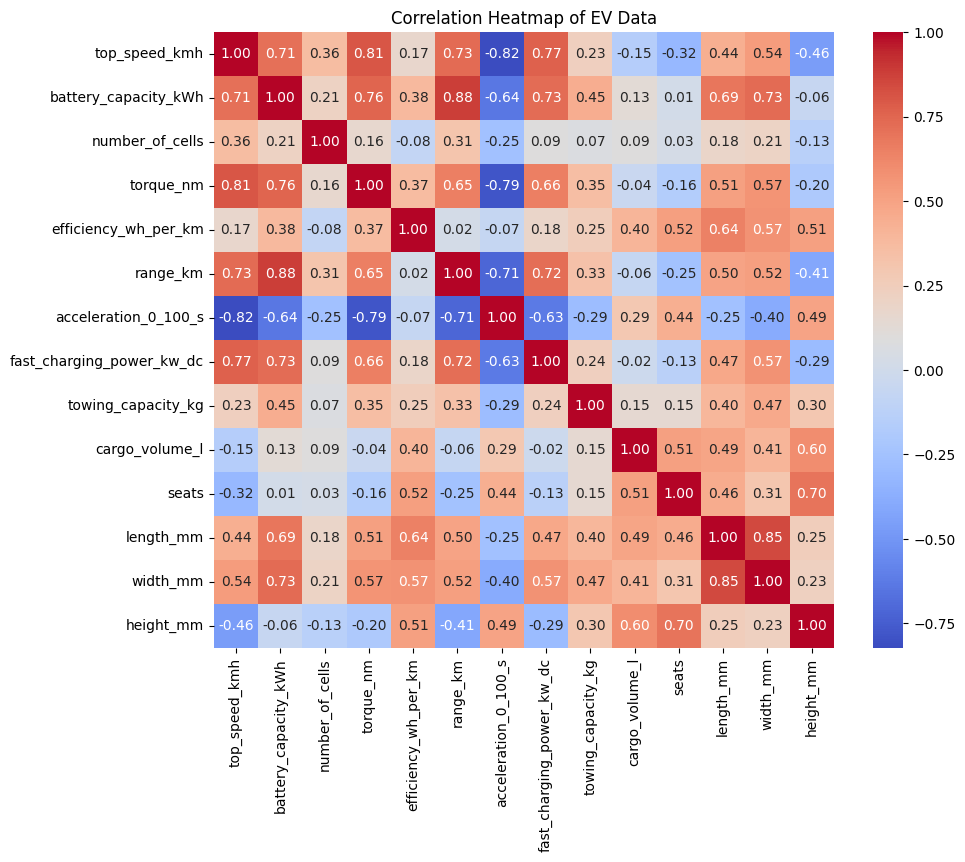

In [75]:
# Plot a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of EV Data")
plt.show()

Conclusion: drop `efficiency_wh_per_km`, `number_of_cells`. These fields show little correlation with most other features including the targe and substantially lack data.
Also drop `towing_capacity_kg` and `cargo_volume_l`. These features present little correlation with the target, while being highly correlated with vehicle size data.

In [76]:
df = df.drop(columns=['efficiency_wh_per_km', 'number_of_cells', 'towing_capacity_kg', 'cargo_volume_l'])

### Consider catgorical features

In [77]:
# Select numeric fields
categorical_df = df.select_dtypes(include=object)

In [78]:
categorical_df.nunique()

,0
brand,59
model,477
battery_type,1
fast_charge_port,2
drivetrain,3
segment,15
car_body_type,8
source_url,478


Clearly drop `brand`, `model`, and `source_url`, since they are not relevant to performance.
Also drop `battery_type` since there is only one value.

In [79]:
df = df.drop(columns=['brand', 'model', 'source_url'])

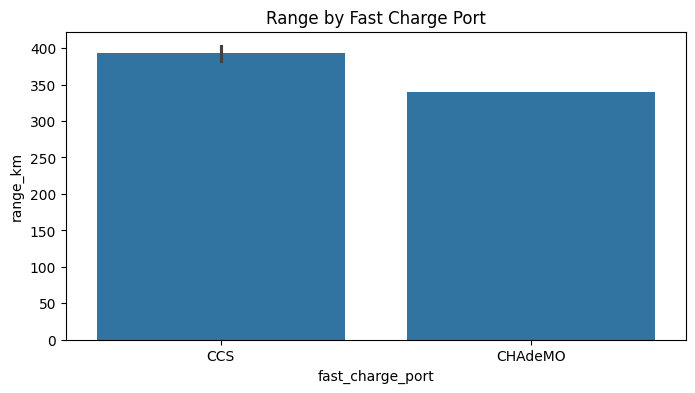

In [80]:
plt.figure(figsize=(8, 4))
sns.barplot(x='fast_charge_port', y='range_km', data=df)
plt.title('Range by Fast Charge Port')
plt.show()

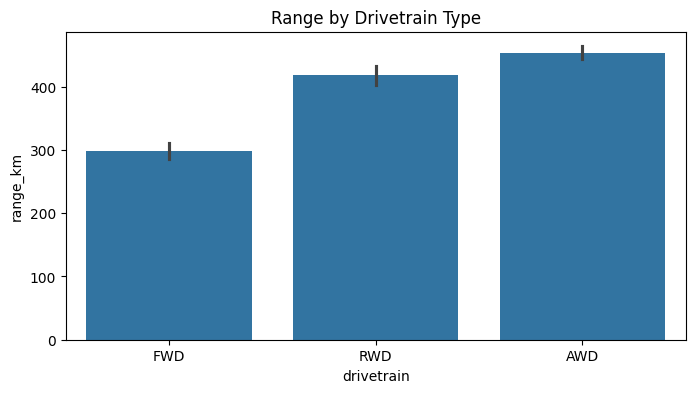

In [81]:
plt.figure(figsize=(8, 4))
sns.barplot(x='drivetrain', y='range_km', data=df)
plt.title('Range by Drivetrain Type')
plt.show()

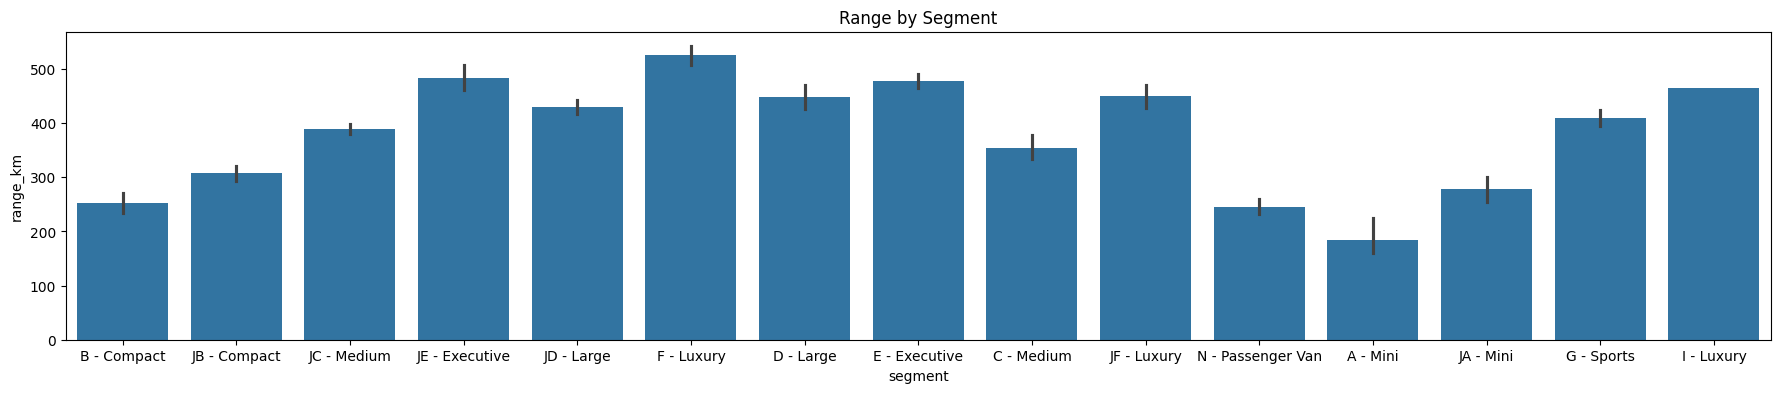

In [82]:
plt.figure(figsize=(22, 4))
sns.barplot(x='segment', y='range_km', data=df)
plt.title('Range by Segment')
plt.show()

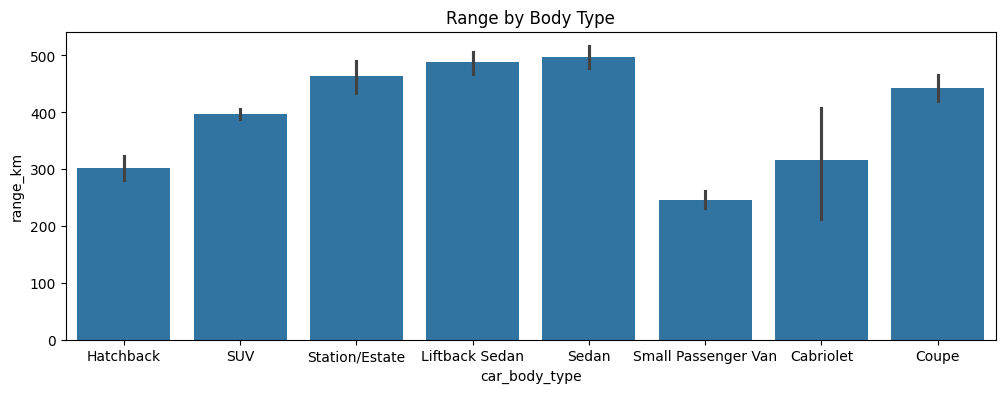

In [83]:
plt.figure(figsize=(12, 4))
sns.barplot(x='car_body_type', y='range_km', data=df)
plt.title('Range by Body Type')
plt.show()

From these distribution plots one may see that:
- `fast_charge_port` seems to have little effect on range but still may have some influence.
- `drivetrain` does show notable relation with target
- `segment` and `car_body_type` seem to relate to car size already described by numerical features, so we drop them. Moreover, these are not technical specs.

In [84]:
df = df.drop(columns=['segment', 'car_body_type'])

### Final selection of features

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478 entries, 0 to 477
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   top_speed_kmh              478 non-null    int64  
 1   battery_capacity_kWh       478 non-null    float64
 2   battery_type               478 non-null    object 
 3   torque_nm                  471 non-null    float64
 4   range_km                   478 non-null    int64  
 5   acceleration_0_100_s       478 non-null    float64
 6   fast_charging_power_kw_dc  477 non-null    float64
 7   fast_charge_port           477 non-null    object 
 8   seats                      478 non-null    int64  
 9   drivetrain                 478 non-null    object 
 10  length_mm                  478 non-null    int64  
 11  width_mm                   478 non-null    int64  
 12  height_mm                  478 non-null    int64  
dtypes: float64(4), int64(6), object(3)
memory usage: 4

There remain some missing values, but not many. Let us just drop such records.

In [86]:
df = df.dropna()

Move target to the end of the dataframe

In [87]:
df = df[[ col for col in df.columns if col != 'range_km' ] + ['range_km']]

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 470 entries, 0 to 477
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   top_speed_kmh              470 non-null    int64  
 1   battery_capacity_kWh       470 non-null    float64
 2   battery_type               470 non-null    object 
 3   torque_nm                  470 non-null    float64
 4   acceleration_0_100_s       470 non-null    float64
 5   fast_charging_power_kw_dc  470 non-null    float64
 6   fast_charge_port           470 non-null    object 
 7   seats                      470 non-null    int64  
 8   drivetrain                 470 non-null    object 
 9   length_mm                  470 non-null    int64  
 10  width_mm                   470 non-null    int64  
 11  height_mm                  470 non-null    int64  
 12  range_km                   470 non-null    int64  
dtypes: float64(4), int64(6), object(3)
memory usage: 51.4+ 

### Result
Now we have a clean dataset of 470 EV desctiptions in technical terms that could be used as parameters in vehicle design. Such a dataset could be used to train a ML model for predicting a car's single-charge range from its technical design.

In [89]:
# Export the resulting dataset to CSV
df.to_csv('application/data.csv')